In [1]:
import GCRCatalogs
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf

# Start by loading the redMaGiC halo catalog from CosmoDC2

In [2]:
# read in redmagic catalog
redmagic = pf.open('/global/projecta/projectdirs/lsst/groups/WL/users/zuntz/data/redmagic/cosmoDC2_v1.1.4_run_redmagic_highdens.fit')
redmagic_ids = redmagic[1].data['id']
redmagic_z = redmagic[1].data['zredmagic']
bins = {}
nbins = 5
zbin = 'bin3'
if zbin == 'bin1':
    bin_sel = (redmagic_z> 0.15)&(redmagic_z< 0.30)
if zbin == 'bin2':
    bin_sel = (redmagic_z> 0.30)&(redmagic_z< 0.45)  
if zbin == 'bin3':
    bin_sel = (redmagic_z> 0.45)&(redmagic_z< 0.60) 

In [3]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')

In [6]:
halo_all = gc.get_quantities(['halo_mass', 'mag_i', 'redshift', 'halo_id', 'galaxy_id', 'isCentral'], filters=['redshift < 0.75', 'redshift > 0.35'])

In [7]:
halo_all

{'galaxy_id': array([9437649587, 9437649590, 9437649592, ..., 9126320129, 9126320133,
        9126320135]),
 'isCentral': array([ True,  True,  True, ...,  True,  True,  True]),
 'halo_mass': array([5.46576759e+10, 7.54796988e+11, 1.15301075e+12, ...,
        5.48830982e+10, 1.81633408e+10, 2.78179162e+10]),
 'mag_i': array([24.91605335, 20.90655224, 18.93905402, ..., 25.87021141,
        26.91203275, 26.8245478 ]),
 'redshift': array([0.35506753, 0.35757623, 0.35544681, ..., 0.74718522, 0.73643127,
        0.74378087]),
 'halo_id': array([      300151365,       600151365,       800151365, ...,
        -14013900146279, -14014300146279, -14014500146279])}

In [8]:
iscentral = halo_all['isCentral']==True

mask_all = np.in1d(halo_all['galaxy_id'],redmagic_ids[bin_sel])
mask_cent = np.in1d(halo_all['galaxy_id'][iscentral],redmagic_ids[bin_sel])
mask_sat = np.in1d(halo_all['galaxy_id'][~iscentral],redmagic_ids[bin_sel])

In [10]:
assert (len(redmagic_ids[bin_sel])==mask_all.sum())
mask_all.sum(), mask_cent.sum(), mask_sat.sum()

(95005, 59936, 35069)

In [14]:
halo_mass_all = halo_all['halo_mass'][mask_all]
halo_mass_cent = halo_all['halo_mass'][iscentral][mask_cent]
halo_mass_sat = halo_all['halo_mass'][~iscentral][mask_sat]


halo_id_all= halo_all['halo_id'][mask_all]
halo_id_cent = halo_all['halo_id'][iscentral][mask_cent]
halo_id_sat = halo_all['halo_id'][~iscentral][mask_sat]

In [15]:
#number of halos occupied by at least one redmagic galaxy
n_halos = len(np.unique(halo_id_all))
print("The number of halos is:", n_halos)

#number of galaxies
n_tot = mask_all.sum()
print("The total number of galaxies is:", n_tot)
n_cent = mask_cent.sum()
print("The number of central galaxies is:", n_cent)
n_sat = mask_sat.sum()
print("The number of satellite galaxies is:", n_sat)
assert(n_tot==n_cent+n_sat)
sat_frac = n_sat/n_tot
print("The satellite fraction is:", sat_frac)
fcen = n_cent/n_halos
print("fcen is (fraction of halos occupied with central galaxies):", fcen)

The number of halos is: 78055
The total number of galaxies is: 95005
The number of central galaxies is: 59936
The number of satellite galaxies is: 35069
The satellite fraction is: 0.36912794063470344
fcen is (fraction of halos occupied with central galaxies): 0.7678688104541669


In [16]:
# mean halo mass of halos where satellites live is higher than where centrals live. That is because centrals are more visible. 
halo_mass_all.mean()/10**(13), halo_mass_cent.mean()/10**(13), halo_mass_sat.mean()/10**(13)

(3.188889674135008, 0.7905520128470062, 7.287859307342619)

In [24]:
# create unique halo catalog of halos occupied by at least one redmagic galaxy:
halo_cat = {}
halo_cat['ids'], index_halo_unique = np.unique(halo_id_all, return_index=True)
halo_cat['mass'] = halo_mass_all[index_halo_unique]

In [25]:
halo_cat['mass']

array([1.78690387e+12, 2.35535044e+12, 2.47923274e+12, ...,
       7.75617711e+12, 8.27937592e+12, 2.96714462e+12])

In [28]:
# create unique halo catalog of all halos in cosmodc2
halo_cat_full = {}
if zbin == 'bin1': 
    zbin_halos = (halo_all['redshift']>0.15) & (halo_all['redshift']<0.3)
if zbin == 'bin2': 
    zbin_halos = (halo_all['redshift']>0.30) & (halo_all['redshift']<0.45)
if zbin == 'bin3': 
    zbin_halos = (halo_all['redshift']>0.45) & (halo_all['redshift']<0.65)
       
halo_cat_full['ids'], index_halo_unique = np.unique(halo_all['halo_id'][zbin_halos], return_index=True)
halo_cat_full['mass'] = halo_all['halo_mass'][zbin_halos][index_halo_unique]

n_halos_cosmodc2 = len(np.unique(halo_all['halo_id'][zbin_halos]))
print("The number of halos in cosmodc2 is:", n_halos_cosmodc2)

The number of halos in cosmodc2 is: 64893360


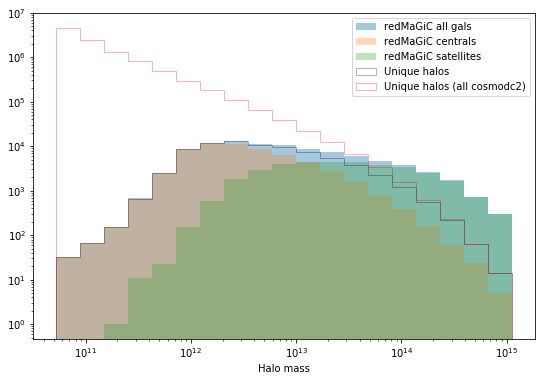

In [29]:
plt.figure(figsize = (9,6))
nbins = 20
bins = np.logspace(np.log10(halo_cat['mass'].min()), np.log10(halo_cat['mass'].max()), nbins)
counts_allgals, _, _= plt.hist(halo_mass_all, label = 'redMaGiC all gals', bins = bins, log= True, alpha = 0.4)
counts_cent, _, _ = plt.hist(halo_mass_cent, label = 'redMaGiC centrals', bins = bins, log = True, alpha = 0.3)
counts_sat, _, _= plt.hist(halo_mass_sat, label = 'redMaGiC satellites', bins = bins, log= True, alpha = 0.3)
#counts_uniquehalos, _, _  = plt.hist(halo_cat['mass'], label = 'Unique halos', bins = bins, alpha = 0.3, histtype = 'step', color = 'k')
counts_uniquehalos_cosmodc2, _, _  = plt.hist(halo_cat_full['mass'], label = 'Unique halos (all cosmodc2)', bins = bins, alpha = 0.3, histtype = 'step', color = 'red')
plt.xlabel('Halo mass')
plt.legend()
plt.xscale('log') 
plt.yscale('log')

### Plot the number of galaxies divided by the total number of halos in CosmoDC2

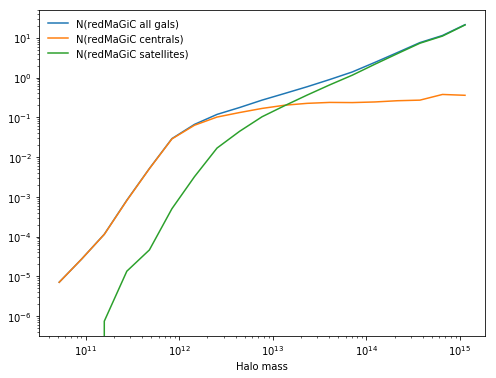

In [30]:
plt.figure(figsize = (8,6))
bins_centers = np.logspace(np.log10(halo_cat['mass'].min()), np.log10(halo_cat['mass'].max()), nbins-1)
plt.plot(bins_centers, counts_allgals/counts_uniquehalos_cosmodc2, label = 'N(redMaGiC all gals)') #, color = 'blue' )
plt.plot(bins_centers, counts_cent/counts_uniquehalos_cosmodc2, label = 'N(redMaGiC centrals)' )#, color = 'orange' )
plt.plot(bins_centers, counts_sat/counts_uniquehalos_cosmodc2, label =  'N(redMaGiC satellites)')#, color = 'green')
#plt.axhline(y=fcen_2, color= 'black', ls = ':', label = 'fcen=%0.2f'%fcen )
plt.xlabel('Halo mass')
plt.legend(frameon=False)
plt.xscale('log') 
plt.yscale('log')

In [31]:
centrals_with_satellites = np.in1d(halo_id_cent, halo_id_sat)
print("Fraction of central galaxies that have satellite galaxies:", centrals_with_satellites.sum()/n_cent)

Fraction of central galaxies that have satellite galaxies: 0.09515149492792312


In [32]:
satellites_with_a_central = np.in1d(halo_id_sat, halo_id_cent)
print("Fraction of satellite galaxies that have a central galaxy:", satellites_with_a_central.sum()/n_sat)

Fraction of satellite galaxies that have a central galaxy: 0.26630357295617213


In [33]:
halo_ids_halos_with_both_centrals_and_satellites= []
halo_ids_halos_with_both_centrals_and_satellites.extend(halo_id_cent[centrals_with_satellites])
halo_ids_halos_with_both_centrals_and_satellites.extend(halo_id_sat[satellites_with_a_central])

In [34]:
print("Fraction of halos that host at least one redmagic galaxy and that are occupied by both centrals and satellites:", len(np.unique(halo_ids_halos_with_both_centrals_and_satellites))/n_tot)

Fraction of halos that host at least one redmagic galaxy and that are occupied by both centrals and satellites: 0.06002841955686543


## Fitting the HOD parameters

In [35]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import scipy

In [37]:
halo_mass = bins_centers
N_cent = counts_cent/counts_uniquehalos_cosmodc2
N_sat = counts_sat/counts_uniquehalos_cosmodc2

In [38]:
N_sat

array([0.00000000e+00, 0.00000000e+00, 7.51305205e-07, 1.35589878e-05,
       4.63567616e-05, 5.04079685e-04, 3.21245512e-03, 1.68500032e-02,
       4.43859434e-02, 1.03362969e-01, 1.95966203e-01, 3.62495953e-01,
       6.53211550e-01, 1.14447761e+00, 2.15384615e+00, 3.97745572e+00,
       7.27433628e+00, 1.10000000e+01, 2.09285714e+01])

### Fit each of the lines separately

In [40]:
# see example from https://stackoverflow.com/questions/51906152/fitting-two-sets-of-data-with-two-different-model-functions-simultaneously-givin
if zbin == 'bin1':
    nstart = 2 
if zbin == 'bin2':  
    nstart = 3
if zbin == 'bin3':  
    nstart = 3
y1 = np.log10(N_cent)
y2 = np.log10(N_sat[nstart:])
comboY = np.append(y1, y2)

x1 = halo_mass
x2 = halo_mass[nstart:]
comboX = np.append(x1, x2)

if len(y1) != len(x1):
    raise(Exception('Unequal x1 and y1 data length'))
if len(y2) != len(x2):
    raise(Exception('Unequal x2 and y2 data length'))
    
    
def function1(Mh, Mmin, sigma_logM, fcen, M1, alpha): #  not all parameters are used here, some are shared
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    """
    centrals = 0.5 * fcen * (1. + scipy.special.erf( (np.log10(Mh)-np.log10(Mmin))/sigma_logM) )
    return np.log10(centrals)

def function2(Mh, Mmin, sigma_logM, fcen, M1, alpha):
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    """
    nc = 0.5 * fcen * (1. + scipy.special.erf( (np.log10(Mh)-np.log10(Mmin))/sigma_logM) )
    satellites = nc * (Mh/M1)**alpha
    return np.log10(satellites)


    
def combinedFunction(comboData, Mmin, sigma_logM, fcen, M1, alpha):
    # single data reference passed in, extract separate data
    extract1 = comboData[:len(x1)] # first data
    extract2 = comboData[len(x1):] # second data

    result1 = function1(extract1, Mmin, sigma_logM, fcen, M1, alpha)
    result2 = function2(extract2, Mmin, sigma_logM, fcen, M1, alpha)

    return np.append(result1, result2)


# some initial parameter values
Mmin_0 = 10**12
simga_logM_0 = 0.3
fcen_0 = 0.2
M1_0 = 10**13
alpha_0 = 1.

initialParameters = np.array([Mmin_0,simga_logM_0, fcen_0, M1_0, alpha_0])

# curve fit the combined data to the combined function
fittedParameters, pcov = curve_fit(combinedFunction, comboX, comboY, initialParameters, maxfev = 100000)

# values for display of fitted function
Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit = fittedParameters

y_fit_1 = function1(x1, Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit) # first data set, first equation
y_fit_2 = function2(x2, Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit) # second data set, second equation

# Total profile: ⟨N (Mh )⟩ = ⟨Nc (Mh )⟩ + ⟨Ns (Mh )⟩
y_fit_2_sameshape = np.array([0]*nstart + list(10**y_fit_2))
y_total_nolog = 10**y_fit_1 + y_fit_2_sameshape

# interpolate total profile
N_total = interp1d(x1, y_total_nolog, kind='linear', axis=- 1, copy=True, bounds_error=None, assume_sorted=False)

print('Mmin = %0.2e, sigma_logM = %0.2f, fcen = %0.2f, M1 = %0.2e, alpha = %0.2f'%(Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit))

Mmin = 4.37e+12, sigma_logM = 0.64, fcen = 0.28, M1 = 1.81e+13, alpha = 1.07


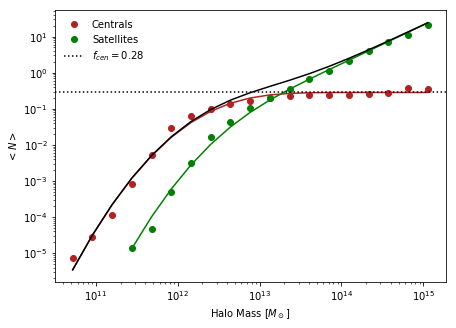

FileNotFoundError: [Errno 2] No such file or directory: '../plots/HOD_bin3.png'

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize = (7,5))
plt.plot(x1, 10**y1, 'o', color = 'firebrick', label = 'Centrals') # plot the raw data
plt.plot(x2, 10**y2, 'o', color = 'green', label = 'Satellites') # plot the raw data
plt.plot(x1, 10**y_fit_1, color = 'firebrick') # plot the equation using the fitted parameters
plt.plot(x2, 10**y_fit_2, color = 'g') # plot the equation using the fitted parameters
plt.plot(x1, y_total_nolog, color = 'k') # plot the equation using the fitted parameters
#plt.plot(x1, N_total(x1), color = 'gray', lw= 0.5)
m_arr = np.geomspace(7E10,1E15,128)
Numgal = N_total(m_arr)
#plt.plot(m_arr, Numgal, color = 'w', lw = 0.5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$<N>$')
plt.xlabel ('Halo Mass [$M_\odot$]')
if zbin == 'bin1':
    plt.title('cosmoDC2 redMaGiC HighDens $0.15< z< 0.3$')
if zbin == 'bin2':
    plt.title('cosmoDC2 redMaGiC HighDens $0.30< z< 0.45$')
plt.axhline(y = fcen_fit, label = '$f_{cen} = %0.2f$'%fcen_fit, ls = ':', color  = 'k')
plt.legend(frameon=False)
plt.show()
plt.savefig('../plots/HOD_%s.png'%zbin, dpi = 300)

In [42]:
print('Log(Mmin) = %0.2f, sigma_logM = %0.2f, fcen = %0.2f, Log(M1) = %0.2f, alpha = %0.2f'%(np.log10(Mmin_fit), sigma_logM_fit, fcen_fit, np.log10(M1_fit), alpha_fit))

Log(Mmin) = 12.64, sigma_logM = 0.64, fcen = 0.28, Log(M1) = 13.26, alpha = 1.07


## Try to do the same but with CCL HOD modeling

In [109]:
# see https://ccl.readthedocs.io/en/latest/api/pyccl.halos.profiles.html#pyccl.halos.profiles.HaloProfileHOD
y1 = np.log10(N_cent)
y2 = np.log10(N_sat[5:])
comboY = np.append(y1, y2)

x1 = halo_mass
x2 = halo_mass[5:] # in order to not have to use heavyside function
comboX = np.append(x1, x2)

if len(y1) != len(x1):
    raise(Exception('Unequal x1 and y1 data length'))
if len(y2) != len(x2):
    raise(Exception('Unequal x2 and y2 data length'))
    
    
def function1(Mh, Mmin, M0, sigma_logM, fcen, M1, alpha): #  not all parameters are used here, some are shared
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    """
    centrals = 0.5 * fcen * (1. + scipy.special.erf( (np.log10(Mh)-np.log10(Mmin))/sigma_logM) )
    return np.log10(centrals)

def function2(Mh, Mmin, M0, sigma_logM, fcen, M1, alpha):
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    """
    nc = 0.5 * (1. + scipy.special.erf( (np.log10(Mh)-np.log10(Mmin))/sigma_logM) ) 
    satellites = nc * (np.fabs(Mh-M0)/M1)**alpha
    return np.heaviside(Mh-M0, 1)*np.log10(satellites)
    
def combinedFunction(comboData, Mmin, M0, sigma_logM, fcen, M1, alpha):
    # single data reference passed in, extract separate data
    extract1 = comboData[:len(x1)] # first data
    extract2 = comboData[len(x1):] # second data

    result1 = function1(extract1, Mmin, M0, sigma_logM, fcen, M1, alpha)
    result2 = function2(extract2, Mmin, M0, sigma_logM, fcen, M1, alpha)

    return np.append(result1, result2)


# some initial parameter values
Mmin_0 = 10**12
M0_0 = 10**12
sigma_logM_0 = 0.3
fcen_0 = 0.2
M1_0 = 10**13
alpha_0 = 1.

initialParameters = np.array([Mmin_0, M0_0, sigma_logM_0, fcen_0, M1_0, alpha_0])

# curve fit the combined data to the combined function
fittedParameters, pcov = curve_fit(combinedFunction, comboX, comboY, initialParameters, maxfev = 100000)

# values for display of fitted function
Mmin_fit, M0_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit = fittedParameters

y_fit_1 = function1(x1, Mmin_fit, M0_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit) # first data set, first equation
y_fit_2 = function2(x2, Mmin_fit, M0_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit) # second data set, second equation



print('Mmin = %0.2e, M0 = %0.2e, sigma_logM = %0.2f, fcen = %0.2f, M1 = %0.2e, alpha = %0.2f'%(Mmin_fit,  M0_fit, simga_logM_fit, fcen_fit, M1_fit, alpha_fit))

Mmin = 1.67e+12, M0 = 6.09e+11, sigma_logM = 0.56, fcen = 0.23, M1 = 5.72e+13, alpha = 0.99


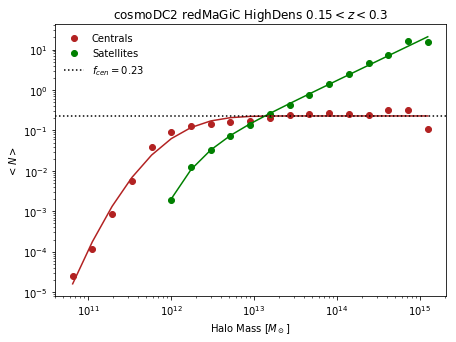

Log(Mmin) = 12.22, Log(M0) = 11.78, sigma_logM = 0.52, fcen = 0.23, Log(M1) = 13.76, alpha = 0.99


In [110]:
plt.figure(figsize = (7,5))
plt.plot(x1, 10**y1, 'o', color = 'firebrick', label = 'Centrals') # plot the raw data
plt.plot(x2, 10**y2, 'o', color = 'green', label = 'Satellites') # plot the raw data
plt.plot(x1, 10**y_fit_1, color = 'firebrick') # plot the equation using the fitted parameters
plt.plot(x2, 10**y_fit_2, color = 'g') # plot the equation using the fitted parameters
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$<N>$')
plt.xlabel ('Halo Mass [$M_\odot$]')
plt.title('cosmoDC2 redMaGiC HighDens $0.15< z< 0.3$')
plt.axhline(y = fcen_fit, label = '$f_{cen} = %0.2f$'%fcen_fit, ls = ':', color  = 'k')
plt.legend(frameon=False)
plt.show()
print('Log(Mmin) = %0.2f, Log(M0) = %0.2f, sigma_logM = %0.2f, fcen = %0.2f, Log(M1) = %0.2f, alpha = %0.2f'%(np.log10(Mmin_fit), np.log10(M0_fit), sigma_logM_fit, fcen_fit, np.log10(M1_fit), alpha_fit))

In [46]:
# Before
# Log(Mmin) = 12.32, sigma_logM = 0.56, fcen = 0.25, Log(M1) = 13.27, alpha = 1.12

# Get galaxy bias from HOD parameters

In [108]:
import pyccl as ccl
import numpy as np

# see https://github.com/LSSTDESC/CCLX/blob/master/Halo-mass-function-example.ipynb for examples 

In [109]:
# Cosmology
cosmo = ccl.Cosmology(Omega_c=0.2199999, Omega_b=0.0448, h=0.71, n_s=0.963, sigma8=0.8, 
                        A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, 
                        T_CMB=None, bcm_log10Mc=14.07918, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, 
                        sigma_0=0.0, c1_mg=1.0, c2_mg=1.0, lambda_mg=0.0, m_nu=0.0, m_nu_type=None, 
                        z_mg=None, df_mg=None, transfer_function='boltzmann_camb', matter_power_spectrum='halofit', 
                        baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', 
                        emulator_neutrinos='strict')
"""
#changing sigma8
cosmo2 = ccl.Cosmology(Omega_c=0.2199999, Omega_b=0.0448, h=0.71, n_s=0.963, sigma8=0.7, 
                        A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, 
                        T_CMB=None, bcm_log10Mc=14.07918, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, 
                        sigma_0=0.0, c1_mg=1.0, c2_mg=1.0, lambda_mg=0.0, m_nu=0.0, m_nu_type=None, 
                        z_mg=None, df_mg=None, transfer_function='boltzmann_camb', matter_power_spectrum='halofit', 
                        baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', 
                        emulator_neutrinos='strict')
#changing omega_m
cosmo3 = ccl.Cosmology(Omega_c=0.27, Omega_b=0.0448, h=0.71, n_s=0.963, sigma8=0.8, 
                        A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, 
                        T_CMB=None, bcm_log10Mc=14.07918, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, 
                        sigma_0=0.0, c1_mg=1.0, c2_mg=1.0, lambda_mg=0.0, m_nu=0.0, m_nu_type=None, 
                        z_mg=None, df_mg=None, transfer_function='boltzmann_camb', matter_power_spectrum='halofit', 
                        baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', 
                        emulator_neutrinos='strict')
"""
# Array of masses
m_arr = np.geomspace(1E10,1E15,128)

# Array of redshifts
z_arr = np.linspace(0.,1.,16)

## Try to do the whole integration with CCL

In [110]:
z = 0.25
k_small = 1E-4
a = 1./(1+z)

# concentration relation
#c_M_relation = ccl.halos.concentration.ConcentrationBhattacharya13()
c_M_relation = ccl.halos.concentration.ConcentrationConstant(c=1, mdef=None)

# halo mass function
massfunc=ccl.halos.MassFuncTinker10(cosmo)

# mass definition
# FoF mass definition
mass_def = ccl.halos.MassDef('fof', 'matter')

# halo bias
hbias = ccl.halos.hbias.HaloBiasTinker10(cosmo, mass_def='fof', mass_def_strict=True)

# Halo model calculator
hmc = ccl.halos.halo_model.HMCalculator(cosmo, massfunc, hbias, mass_def, log10M_min=8.0, log10M_max=16.0, nlog10M=128, integration_method_M='simpson', k_min=1e-05)

AttributeError: 'str' object has no attribute 'Delta'

In [68]:
prof = ccl.halos.HaloProfileHOD(c_M_relation, 
                                lMmin_0=np.log10(Mmin_fit), lMmin_p=0.0, 
                                siglM_0=sigma_logM_fit, siglM_p=0.0, 
                                lM0_0=np.log10(M0_fit), lM0_p=0.0, 
                                lM1_0=np.log10(M1_fit), lM1_p=0.0, 
                                alpha_0=alpha_fit, alpha_p=0.0, 
                                fc_0=fcen_fit, fc_p=0.0, 
                                bg_0=1.0, bg_p=0.0, bmax_0=1.0, bmax_p=0.0, a_pivot=1.0)


In [86]:
# get the large scale bias using a small k number. This doesn't work for fof masses. 
# see https://ccl.readthedocs.io/en/latest/api/pyccl.halos.halo_model.html?highlight=halos.halomod_bias_1pt#pyccl.halos.halo_model.halomod_bias_1pt
b = ccl.halos.halomod_bias_1pt(cosmo, hmc, k_small, a, prof, normprof=True)

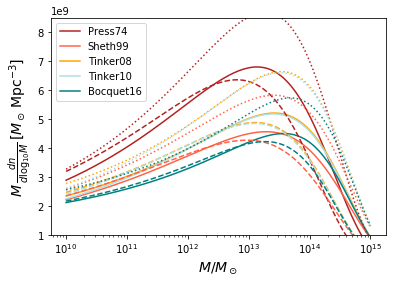

In [19]:

plt.figure()
cosmos = [cosmo1, cosmo2, cosmo3 ]
ls = ['-', '--', ':']
colors = ['firebrick', 'tomato', 'orange', 'powderblue', 'teal', 'k']
for i, cosmo in enumerate(cosmos):
    hmfs = []
    # Press & Schechter mass function
    hmfs.append(ccl.halos.MassFuncPress74(cosmo))

    # Sheth & Tormen mass function
    hmfs.append(ccl.halos.MassFuncSheth99(cosmo))

    # Tinker 2008 mass function
    hmfs.append(ccl.halos.MassFuncTinker08(cosmo))

    # Tinker 2010 mass function
    hmfs.append(ccl.halos.MassFuncTinker10(cosmo))

    # Bocquet 2016 mass function
    hmfs.append(ccl.halos.MassFuncBocquet16(cosmo))

    # Let's plot all of them at z=0

    for j, mf in enumerate(hmfs):
        nm = mf.get_mass_function(cosmo, m_arr, 1.)
        if i==0:
            plt.plot(m_arr, m_arr * nm, label=mf.name, ls = ls[i], color = colors[j])
        else:
            plt.plot(m_arr, m_arr * nm, ls = ls[i], color = colors[j])
plt.xscale('log')
plt.ylim([1E9,8.5E9])
plt.legend()
plt.xlabel(r'$M/M_\odot$', fontsize=14)
plt.ylabel(r'$M\,\frac{dn}{d\log_{10}M}\,[M_\odot\,{\rm Mpc}^{-3}]$',
           fontsize=14);

## Try to do the galaxy bias integration myself, using some CCL functions, with FOF masses

In [111]:
z = 0.25
k_small = 1E-4
a = 1./(1+z)

# Array of masses
m_arr = np.geomspace(1E10,1E15,128)

# Cosmology
cosmo = ccl.Cosmology(Omega_c=0.2199999, Omega_b=0.0448, h=0.71, n_s=0.963, sigma8=0.8, 
                        A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, 
                        T_CMB=None, bcm_log10Mc=14.07918, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, 
                        sigma_0=0.0, c1_mg=1.0, c2_mg=1.0, lambda_mg=0.0, m_nu=0.0, m_nu_type=None, 
                        z_mg=None, df_mg=None, transfer_function='boltzmann_camb', matter_power_spectrum='halofit', 
                        baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', 
                        emulator_neutrinos='strict')

# halo mass function
hmf = ccl.halos.hmfunc.MassFuncSheth99(cosmo, mass_def=None, mass_def_strict=True, use_delta_c_fit=False) #default using FoF masses
hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None) # mass function 𝑑𝑛/𝑑log10𝑀 in units of Mpc^-3 (comoving).

# halo bias
hbias = ccl.halos.hbias.HaloBiasSheth01(cosmo, mass_def=None, mass_def_strict=True) #fof masses will be used by default
hbias.get_halo_bias(cosmo, m_arr, a, mdef_other=None)

array([0.75895577, 0.76078563, 0.76268375, 0.76465213, 0.76669281,
       0.76880791, 0.77099963, 0.77327023, 0.77562204, 0.77805746,
       0.78057901, 0.78318925, 0.78589084, 0.78868653, 0.79157919,
       0.79457178, 0.79766736, 0.80086911, 0.80418031, 0.80760436,
       0.81114478, 0.8148052 , 0.81858942, 0.82250132, 0.82654496,
       0.83072452, 0.83504437, 0.83950904, 0.8441232 , 0.84889172,
       0.85381964, 0.8589122 , 0.86417485, 0.86961326, 0.87523329,
       0.88104106, 0.8870429 , 0.8932454 , 0.89965543, 0.90628009,
       0.9131268 , 0.92020326, 0.92751748, 0.93507782, 0.942893  ,
       0.95097208, 0.9593245 , 0.96796009, 0.97688909, 0.9861222 ,
       0.99567057, 1.00554581, 1.01576003, 1.02632586, 1.03725653,
       1.04856582, 1.06026817, 1.07237862, 1.08491288, 1.09788738,
       1.11131931, 1.12522667, 1.13962825, 1.15454373, 1.16999368,
       1.18599963, 1.20258418, 1.21977098, 1.2375848 , 1.2560516 ,
       1.27519856, 1.29505425, 1.31564867, 1.33701332, 1.35918

In [112]:
def ngal_hod(z):
    """
    Number density of galaies, based on HOD modeling
    input
    -----
    - z : redshift
    output
    ------
    number density of galaxies, in Mpc^-3
    """
    
    #define mass array
    m_arr = np.geomspace(7E10,1E15,128)
    
    # HOD profile
    Numgal = N_total(m_arr)
    
    # convert to scale factor
    a = 1./(1+z)
    
    # HMF calculation
    hmf = ccl.halos.hmfunc.MassFuncSheth99(cosmo, mass_def=None, mass_def_strict=True, use_delta_c_fit=False) #default using FoF masses
    dndlnM = hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None) # mass function 𝑑𝑛/𝑑log10𝑀 in units of Mpc^-3 (comoving).

    # Do the integral in log spaced M
    #n_g = integral(dlogM * dn/dlogM <N>)    
        
    return np.trapz(y=Numgal*dndlnM, x=np.log10(m_arr))

In [113]:
def bgal_hod(z):
    """
    Calculates the galaxy bias, based on HOD modeling
    input
    -----
    - z : redshift
    output
    ------
    galaxy bias, dimensionless
    """
    
    #define mass array
    m_arr = np.geomspace(7E10,1E15,128)
    
    # HOD profile: number of galaxies in halo from HOD
    Numgal = N_total(m_arr)

    # galaxy number density calculation
    ngal = ngal_hod(z)
    
    # convert to scale factor
    a = 1./(1+z)

    # halo bias calculation
    hbias = ccl.halos.hbias.HaloBiasSheth01(cosmo, mass_def=None, mass_def_strict=True) #fof masses will be used by default
    b_h = hbias.get_halo_bias(cosmo, m_arr, a, mdef_other=None)

    # HMF calculation
    hmf = ccl.halos.hmfunc.MassFuncSheth99(cosmo, mass_def=None, mass_def_strict=True, use_delta_c_fit=False) #default using FoF masses
    dndlnM = hmf.get_mass_function(cosmo, m_arr, a, mdef_other=None) # mass function 𝑑𝑛/𝑑log10𝑀 in units of Mpc^-3 (comoving)

    # calculation of average galaxy bias
    #for i in range(NMh):
    #    integrand[i] = b_h[i] * dndlnM[i] * Numgal[i]
    integrand = b_h * dndlnM * Numgal

    return np.trapz(y=integrand, x=np.log10(m_arr))/ngal


In [118]:
zs = np.linspace(0.30, 0.45, 10)
bias  = []
for z in zs:
    bias.append(bgal_hod(z))

Text(0.5, 1.0, '1st redshift bin')

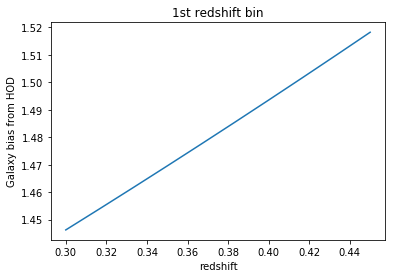

In [119]:
plt.plot(zs, bias)
plt.xlabel('redshift')
plt.ylabel('Galaxy bias from HOD')
#plt.axhline(y=bgal_bin1, color = 'red')
#plt.plot(zl, nzs[0]/5)
#plt.xlim(0,0.5)
plt.title('1st redshift bin')

## Get the galaxy bias averaged over the redshift distribution

In [120]:
def bgal_avg_hod(zl, nzl):
    """
    Calculates the redshift avereged galaxy bias,
    based on HOD modeling,
    averaged over the lens redshift distribution
    ------
    average galaxy bias, dimensionless
    """
    # setup integrand
    bgal_hod_zs = []
    for i in range(len(zl)):
        bgal_hod_zs.append(bgal_hod(zl[i]))
    bgal_hod_zs = np.array(bgal_hod_zs)
    
    integrand = bgal_hod_zs * nzl

    return np.trapz(y=integrand, x=zl)

In [117]:
dir = '/global/cscratch1/sd/jprat/TXPipe/data/cosmodc2/outputs_redmagic/2021/no_shape_noise/7sbins/'
zl = np.loadtxt(dir + 'z_lens.txt')
nzs = np.loadtxt(dir + 'nzs_lens.txt')

In [121]:
bgal_avg_hod(zl, nzs[1])

1.4791095030717494

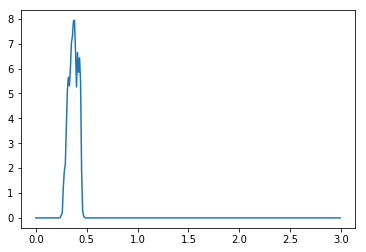

In [122]:
plt.plot(zl, nzs[1])

In [71]:
# bin 1 
b1 = 1.4316230070086657
Mmin = 2.11e+12, sigma_logM = 0.56, fcen = 0.25, M1 = 1.84e+13, alpha = 1.12
Log(Mmin) = 12.32, sigma_logM = 0.56, fcen = 0.25, Log(M1) = 13.27, alpha = 1.12

In [ ]:
# bin2
Mmin = 1.88e+12, sigma_logM = 0.55, fcen = 0.47, M1 = 1.66e+13, alpha = 1.09
Log(Mmin) = 12.27, sigma_logM = 0.55, fcen = 0.47, Log(M1) = 13.22, alpha = 1.09